# Week6 Lab

## Download & Extract Data

Programmatically download the zip file & extract

In [4]:
from zipfile import ZipFile
file_url = 'https://github.com/msaricaumbc/DS601_Fall21/raw/main/Week06/data/lab_data.zip'


## Reading data from a csv file

For the file `PoliceShootingsUS.csv`, please answer the following questions:

* How many offenders are older than 55? 

In [6]:
from urllib import request

def download_file(file_name, url):
    res = request.urlopen(url)
    with open(file_name,'wb') as file:
        file.write(res.read())
    
download_file('data-text.json', 'https://raw.githubusercontent.com/jackiekazil/data-wrangling/master/data/chp3/data-text.json')
download_file('data-text.csv' , 'https://raw.githubusercontent.com/jackiekazil/data-wrangling/master/data/chp3/data-text.csv')

In [9]:
def unzip(file_name, path='./'):
    # opening the zip file in READ mode 
    with ZipFile(file_name, 'r') as zip: 
        # printing all the contents of the zip file 
        zip.printdir() 

        # extracting all the files 
        print('Extracting all the files now...') 
        zip.extractall(path = path) 
        print('Done!') 

In [16]:
file_url = 'https://github.com/msaricaumbc/DS601_Fall21/raw/main/Week06/data/lab_data.zip'
file_name = 'lab_data'
download_file(file_name, file_url)

unzip(file_name)


File Name                                             Modified             Size
PoliceShootingsUS.csv                          2021-09-21 20:53:54       227653
__MACOSX/._PoliceShootingsUS.csv               2021-09-21 20:53:54          276
volunteers.txt                                 2021-10-06 00:32:28         7015
__MACOSX/._volunteers.txt                      2021-10-06 00:32:28          176
Extracting all the files now...
Done!


* What's the age distribution?

In [ ]:
import pandas as pd


In [25]:
df = pd.read_csv('PoliceShootingsUS.csv', encoding = "Windows - 1252")
df.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False


<AxesSubplot:>

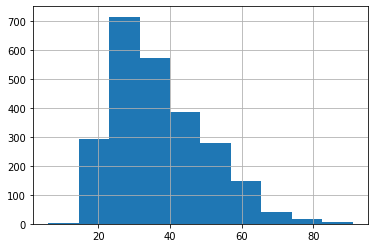

In [26]:
## Your code is here
df['age'].hist()



## Dirty data

Read `volunteers.txt` file and perform the following action:

* Create a dataframe with columns: Name, Lastname, State

In [57]:
## Your code is here
# !head volunteers.txt

lastnames = []
names=[]
states = []
path = 'volunteers.txt'
with open('volunteers.txt') as f:
    lines = f.readlines()
    for line in lines:
        
        line = line \
                .replace('"',',') \
                .replace('[',',') \
                .replace(']',',') \
                .replace('(',',') \
                .replace(')',',') \
                .replace('-',',') 
#         print(line)
        
        parts = line.split(',')
#         print(parts)
        lastname = parts[3].strip()
        name = parts[4].strip()
        state = parts[6].strip()
        
        names.append(name)
        lastnames.append(lastname)
        states.append(state)
        
df = pd.DataFrame()
df['Name'] = names
df['Lastname'] = lastnames
df['State'] = states
df

,Name,Lastname,State
0,Christine,Harding,Virginia
1,Kimberly,Davis,New York
2,Rachel,Ingram,Louisiana
3,Richard,Walker,Oregon
4,Francisco,Barnes,Virginia
...,...,...,...
95,Kevin,Smith,North Dakota
96,Mark,Moore,Alaska
97,Jennifer,Landry,Wyoming
98,Lori,Phillips,Arkansas
